In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk
import csv
import requests
from io import  StringIO
from sklearn.tree import DecisionTreeClassifier

In [19]:
pd.options.mode.chained_assignment = None
seed=0
np.random.seed(seed)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df = pd.read_csv('ulasan_mytelkomsel.csv')

In [21]:
df = df.drop(columns=['replyContent', 'repliedAt', 'reviewCreatedVersion', 'appVersion', 'userImage'])


In [22]:
df.drop_duplicates()

,reviewId,userName,content,score,thumbsUpCount,at
0,c243db1b-429d-49c4-8b0e-e2fde2931a21,Pengguna Google,"Dulu enak harga sama kualitas bagus, lah sekar...",1,0,2025-01-21 21:12:19
1,104735d5-92ae-476c-ad49-baf06f12d8d5,Pengguna Google,Saran ya untuk pengembang aplikasi MyTelkomsel...,2,110,2025-04-05 13:58:41
2,15fc0c54-967b-4007-a0fd-ceb963ef0a7c,Pengguna Google,saya kasih bintang 3 karena masih banyak bug. ...,3,186,2025-03-30 21:53:05
3,a483e675-2e6f-4d1e-84d4-56708ca51767,Pengguna Google,saya naikin ke bintang 3 karna jaringan mulai ...,3,156,2025-03-28 19:06:51
4,282218be-5447-4b97-9706-53ecf586c483,Pengguna Google,Aplikasinya berat banget... Dan Jaringan telko...,2,8,2025-04-10 15:10:15
...,...,...,...,...,...,...
9995,6d15e0b6-9ce4-4d65-a4f4-850467550ffe,Dimas Saputra pratama,"Mahal nya doang paketan simpati, sinyal nya ka...",4,0,2025-01-22 12:45:23
9996,6a40c088-763b-4328-b997-45367f3e85a9,coplo jr,Aplikasinya lalod amat setiap mau beli data ha...,1,0,2025-03-14 05:56:36
9997,629d7000-eb2b-4f7a-8cdb-d8513c28db4e,Safir dCamm,Aplikasi nya terlalu berat. Nge bug nge leg......,1,0,2024-11-05 15:03:46
9998,0686b724-135c-4186-a2fc-43a68a37c201,ANOMALI,Makin lama makin berat nih apk. Banyak menu2 d...,1,0,2024-11-14 08:57:07


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) 
    text = re.sub(r'#[A-Za-z0-9]+', '', text) 
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text) 
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text
 
def casefoldingText(text): 
    text = text.lower()
    return text
 
def tokenizingText(text): 
    text = word_tokenize(text)
    return text
 
def filteringText(text): 
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','gue','lu','loe','lo','kok','lah',
    'nih','tuh','dong','aja','deh','kan','lah','lahh','lho','loh','yee','ya',
    'ga','gaa','gitu','gini','wkwk','wkwkwk','haha','hehe','anjay','anjir','woi','woii','woy',
    'btw','banget','bang','min','admin','mantul','top','sip','oke','ok','kak',
    'bro','sis','cuy','gan','om','bos','bosque','ciyus','serius','wow','mantap',
    'terbaik','bagus','jelek','parah','ampas','fix','the','best','lol','lmao'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    words = text.split()
 
    stemmed_words = [stemmer.stem(word) for word in words]
 
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

In [25]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual",
    "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "dr": "dari", "yg": "yang",
    "tdk": "tidak", "udh": "sudah", "blm": "belum", "dgn": "dengan"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [26]:
df['text_clean'] = df['content'].apply(cleaningText)
 

df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
 
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
 
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
 
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
 
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [27]:
lexicon_positive = dict()

response_positive = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response_positive.status_code == 200:
    reader = csv.reader(StringIO(response_positive.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print('Failed to fetch positive lexicon data')

lexicon_negative = dict()

response_negative = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response_negative.status_code == 200:
    reader = csv.reader(StringIO(response_negative.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print('Failed to fetch negative lexicon data')


In [28]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity = ''
    if (score>=0):
        polarity = 'positive'
    elif(score<0):
        polarity = 'negative'
    return score, polarity

In [29]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
negative    7174
positive    2826
Name: count, dtype: int64


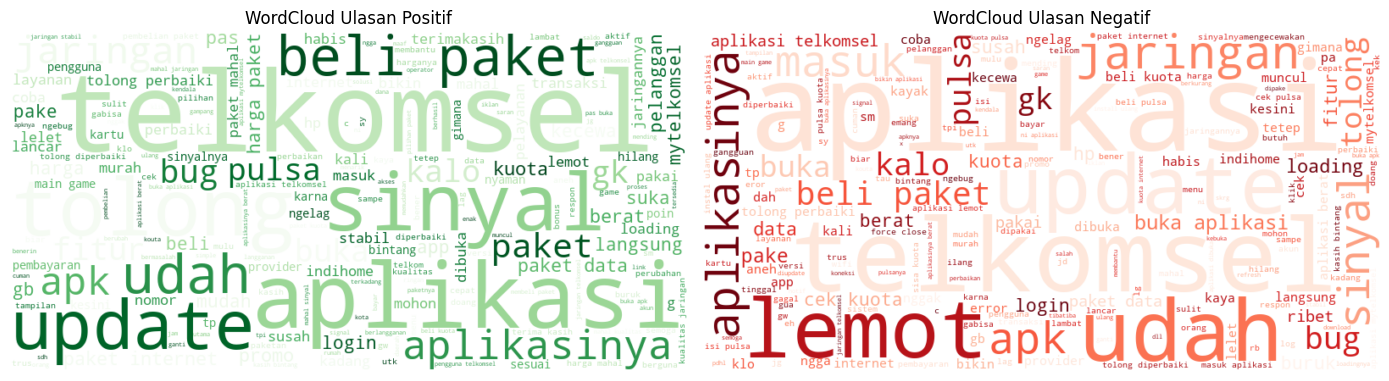

In [30]:
positive_words = ' '.join(df[df['polarity'] == 'positive']['text_akhir'].astype(str))
negative_words = ' '.join(df[df['polarity'] == 'negative']['text_akhir'].astype(str))

# Buat WordCloud untuk positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)

# Buat WordCloud untuk negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)

# Tampilkan
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Ulasan Positif')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Ulasan Negatif')

plt.tight_layout()
plt.show()

In [31]:
X = df['text_akhir']
y = df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [33]:
decision = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
decision.fit(X_train.toarray(), y_train)

y_pred_train_dt = decision.predict(X_train.toarray())
y_pred_test_dt = decision.predict(X_test.toarray())

acc_train_dt = accuracy_score(y_pred_train_dt, y_train)
acc_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - Accuracy_train:', acc_train_dt)
print('Decision Tree - Accuracy_test', acc_test_dt)


Decision Tree - Accuracy_train: 0.821125
Decision Tree - Accuracy_test 0.7545
